In [ ]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline

In [ ]:
tf.__version__

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [ ]:
x_train = x_train / 255.0  # Values Between 0 and 1
x_test = x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid',))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_crossentropy'])    

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=10)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

In [ ]:
test_accuracy

In [ ]:
model_dir = 'model/'
version = 1

In [ ]:
export_path = os.path.join(model_dir,str(version))

In [ ]:
export_path

In [ ]:
  if os.path.isdir(export_path):
    !rm -r {export_path}

# Sabe PB File
https://stackoverflow.com/questions/62079274/difference-between-pb-and-h5

In [ ]:
tf.saved_model.save(export_dir=export_path,obj=model)

Create a OS Enviroment to TF Serving locate model

In [ ]:
os.environ["model_dir"] = os.path.abspath(model_dir)

## Tensorflow Serving API REST

Add TensorFlow Serving distribution URI as a package source 


In [ ]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

Install and update TensorFlow ModelServer

In [ ]:
!apt-get update && apt-get install tensorflow-model-server

### Run Sever

In [ ]:
%%bash --bg 
nohup tensorflow_model_server --rest_api_port 8501 --model_name=cifar10 --model_base_path="${model_dir}" > server.log 2?&1

In [ ]:
!tail server.log

## Create Post Request

In [65]:
random_image = np.random.randint(0, len(x_test))

### Create JSON Object

In [ ]:
data = json.dumps({'signature_name':'serving_default',
                   'intances':x_test[random_image].tolist()
                   })

In [ ]:
data

## Send Json to TF Serving

In [ ]:
headers = {'content-type':'application/json'}

In [ ]:
json_responde = requests.post(url="http://localhost:8501/v1/models/cifar10:predict",data=data,headers=headers)

In [ ]:
json_responde

In [ ]:
predictions = json.loads(json_response.text)

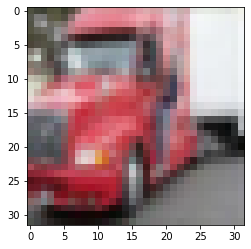

In [66]:
plt.imshow(x_test[random_image])

In [ ]:
class_names[np.argmax(prediction(0))]

In [ ]:
specific_json_responde = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict",data=data,headers=headers)